![Two data scientists working on a dashboard.](hr-image-small.png)

A common problem when creating models to generate business value from data is that the datasets can be so large that it can take days for the model to generate predictions. Ensuring that your dataset is stored as efficiently as possible is crucial for allowing these models to run on a more reasonable timescale without having to reduce the size of the dataset.

You've been hired by a major online data science training provider called *Training Data Ltd.* to clean up one of their largest customer datasets. This dataset will eventually be used to predict whether their students are looking for a new job or not, information that they will then use to direct them to prospective recruiters.

You've been given access to `customer_train.csv`, which is a subset of their entire customer dataset, so you can create a proof-of-concept of a much more efficient storage solution. The dataset contains anonymized student information, and whether they were looking for a new job or not during training:

| Column                   | Description                                                                      |
|------------------------- |--------------------------------------------------------------------------------- |
| `student_id`             | A unique ID for each student.                                                    |
| `city`                   | A code for the city the student lives in.                                        |
| `city_development_index` | A scaled development index for the city.                                         |
| `gender`                 | The student's gender.                                                            |
| `relevant_experience`    | An indicator of the student's work relevant experience.                          |
| `enrolled_university`    | The type of university course enrolled in (if any).                              |
| `education_level`        | The student's education level.                                                   |
| `major_discipline`       | The educational discipline of the student.                                       |
| `experience`             | The student's total work experience (in years).                                  |
| `company_size`           | The number of employees at the student's current employer.                       |
| `company_type`           | The type of company employing the student.                                       |
| `last_new_job`           | The number of years between the student's current and previous jobs.             |
| `training_hours`         | The number of hours of training completed.                                       |
| `job_change`             | An indicator of whether the student is looking for a new job (`1`) or not (`0`). |

# EDA 

In [3]:
# Import necessary libraries
import pandas as pd

# Load the dataset
ds_jobs = pd.read_csv("customer_train.csv")

# View the dataset
ds_jobs.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# Create a copy of ds_jobs for transforming
df = ds_jobs.copy()


In [5]:
# EDA to help identify ordinal, nominal, and two-factor categories
for col in df.select_dtypes("object").columns:
    print(df[col].value_counts(), '\n')

city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64 

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64 

relevant_experience
Has relevant experience    13792
No relevant experience      5366
Name: count, dtype: int64 

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64 

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64 

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64 

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
df.columns

Index(['student_id', 'city', 'city_development_index', 'gender',
       'relevant_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'job_change'],
      dtype='object')

In [8]:
# fill na 
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['enrolled_university'].fillna(df['enrolled_university'].mode()[0],inplace=True)
df['education_level'].fillna(df['education_level'].mode()[0],inplace=True)
df['major_discipline'].fillna(df['major_discipline'].mode()[0],inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0],inplace=True)
df['company_type'].fillna(df['company_type'].mode()[0],inplace=True)
df['last_new_job'].fillna(df['last_new_job'].mode()[0],inplace=True)
df['experience'].fillna(df['experience'].mode()[0],inplace=True)

In [9]:
df['gender'].value_counts()

gender
Male      17729
Female     1238
Other       191
Name: count, dtype: int64

In [10]:
df['gender']= df['gender'].str.replace('Other',df['gender'].mode()[0],regex=True)

In [11]:
df['gender'].value_counts()

gender
Male      17920
Female     1238
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [13]:
df.isna().sum()

student_id                0
city                      0
city_development_index    0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
job_change                0
dtype: int64

In [14]:
df.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevant experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevant experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [15]:
# remove all unknown signe 
df.replace(['^a-zA-Z'],"",inplace=True,regex=True)

In [16]:
# remove all unknown signe 
df['experience'].replace(r'[<>]',"",regex=True,inplace=True)
df['last_new_job'].replace(r'[<>]',"",regex=True,inplace=True)
df['last_new_job'].replace('never',0,regex=True,inplace=True)

In [17]:
df.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,4,47,0.0
2,11561,city_21,0.624,Male,No relevant experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0.0
3,33241,city_115,0.789,Male,No relevant experience,no_enrollment,Graduate,Business Degree,1,50-99,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0.0


In [18]:
df.describe(include='all')

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
count,19158.000000,19158,19158.000000,19158,19158,19158,19158,19158,19158,19158,19158,19158,19158.000000,19158.000000
unique,NaN,123,NaN,2,2,3,5,6,20,8,6,5,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevant experience,no_enrollment,Graduate,STEM,20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,17920,13792,14203,12058,17305,3499,9021,15957,8463,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [19]:
df['job_change'].value_counts()

job_change
0.0    14381
1.0     4777
Name: count, dtype: int64

In [20]:
df['job_change'] = df['job_change'].astype('int')

In [21]:
df['job_change'].value_counts()

job_change
0    14381
1     4777
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [23]:
df.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,20,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,4,47,0
2,11561,city_21,0.624,Male,No relevant experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0
3,33241,city_115,0.789,Male,No relevant experience,no_enrollment,Graduate,Business Degree,1,50-99,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0


# Visualize 


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [23]:
df.columns

Index(['student_id', 'city', 'city_development_index', 'gender',
       'relevant_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'job_change'],
      dtype='object')

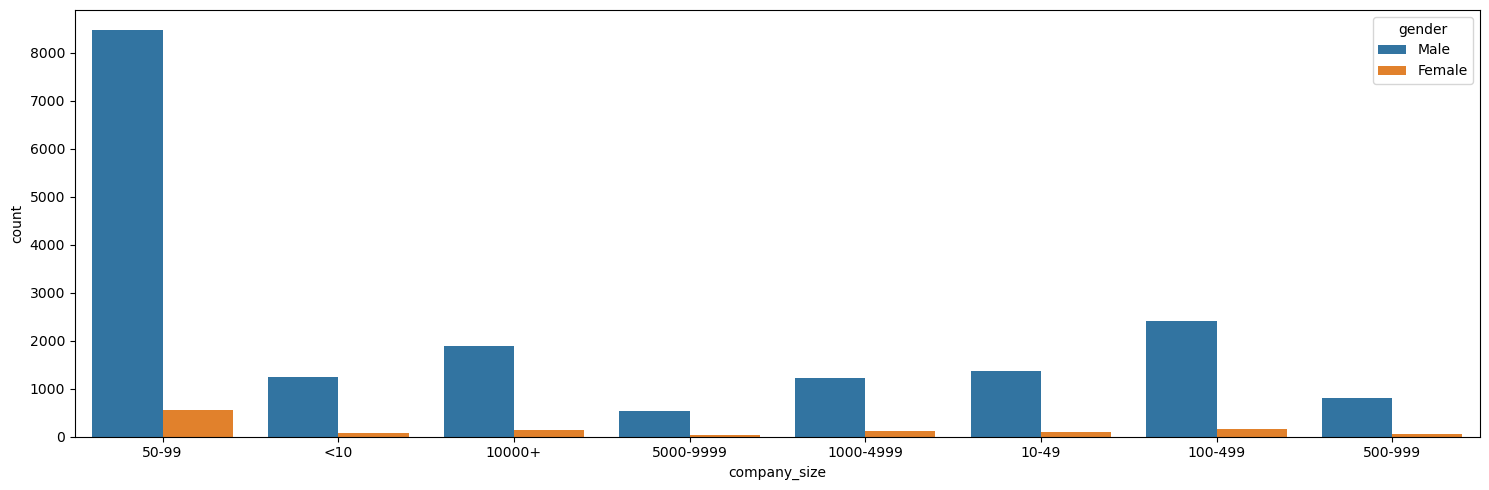

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='company_size',hue='gender')
plt.tight_layout()
plt.show()

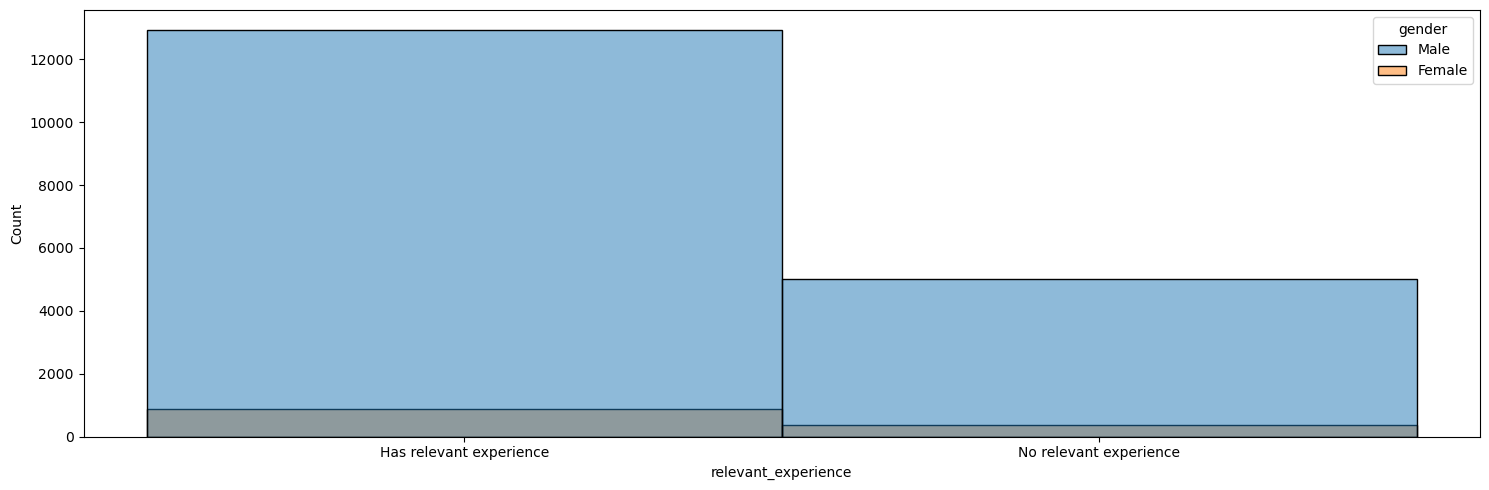

In [25]:
plt.figure(figsize=(15,5))
sns.histplot(df,x='relevant_experience',hue='gender')
plt.tight_layout()
plt.show()

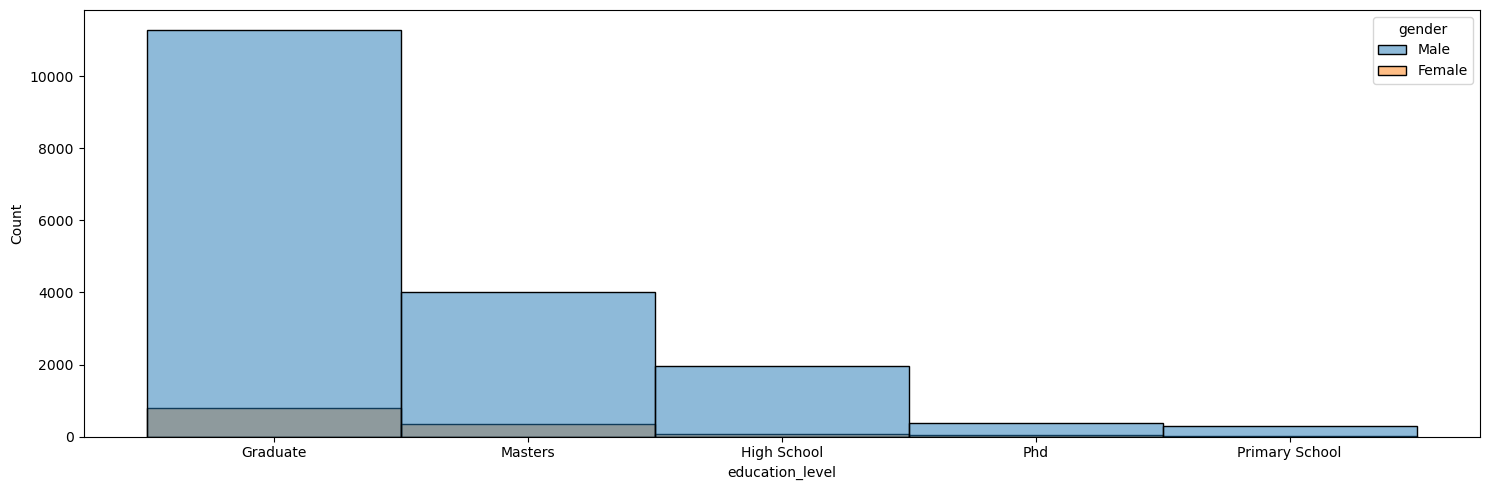

In [49]:
plt.figure(figsize=(15,5))
sns.histplot(df,x='education_level',hue='gender')
plt.tight_layout()
plt.show()

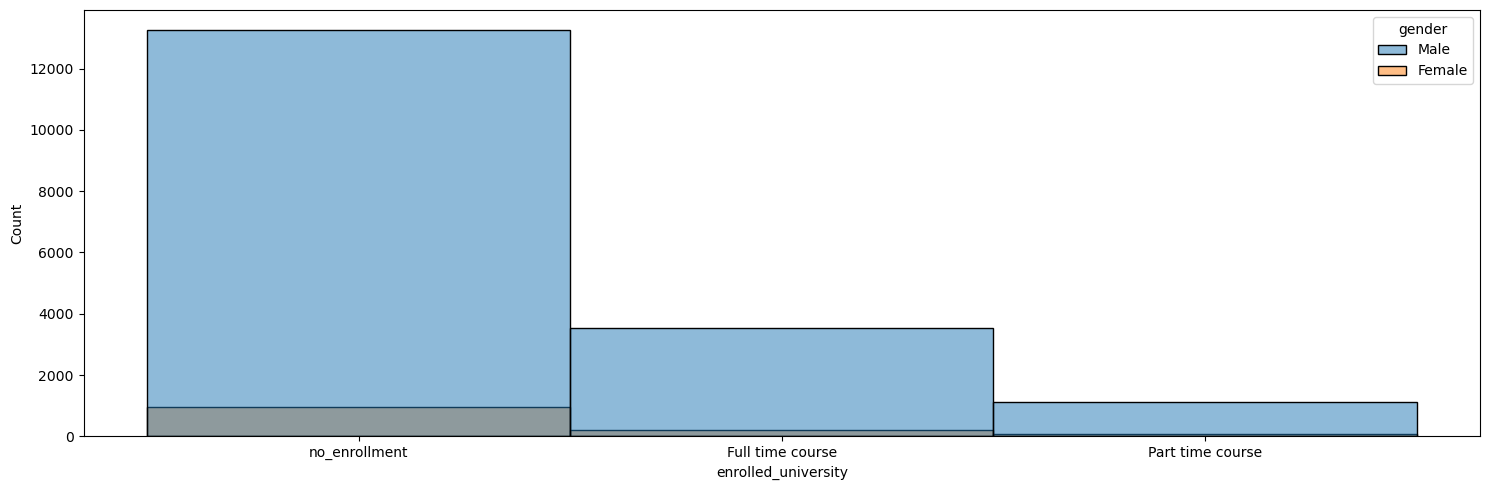

In [51]:
plt.figure(figsize=(15,5))
sns.histplot(df,x='enrolled_university',hue='gender')
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

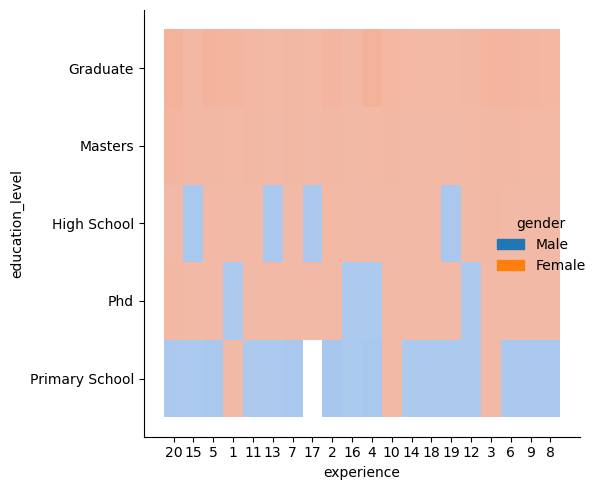

In [101]:
plt.figure(figsize=(15,5))
sns.displot(df,x='experience',y='education_level',hue='gender')
plt.tight_layout()
plt.show()

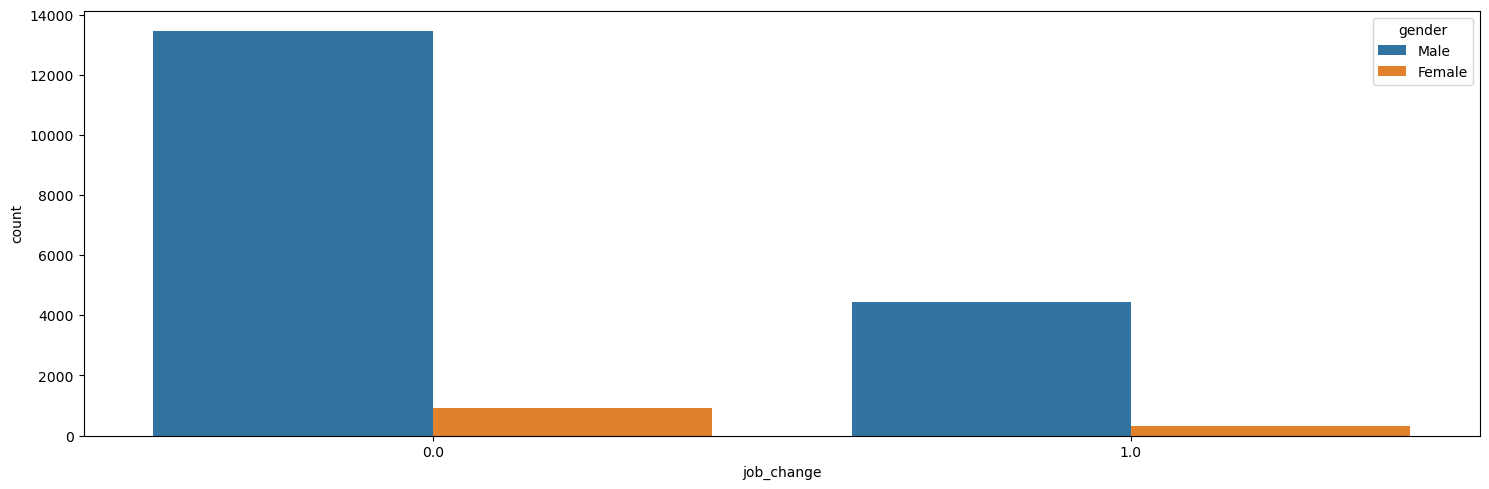

In [115]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='job_change',hue='gender')
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

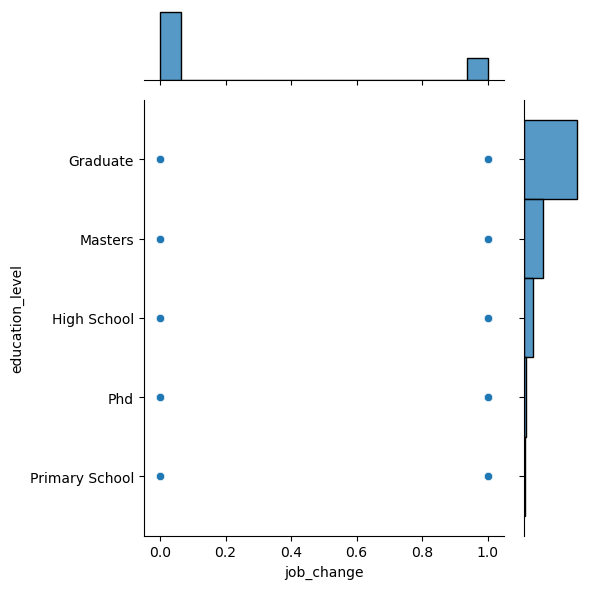

In [159]:
plt.figure(figsize=(15,5))
sns.jointplot(df,x='job_change',y='education_level')
plt.tight_layout()
plt.show()

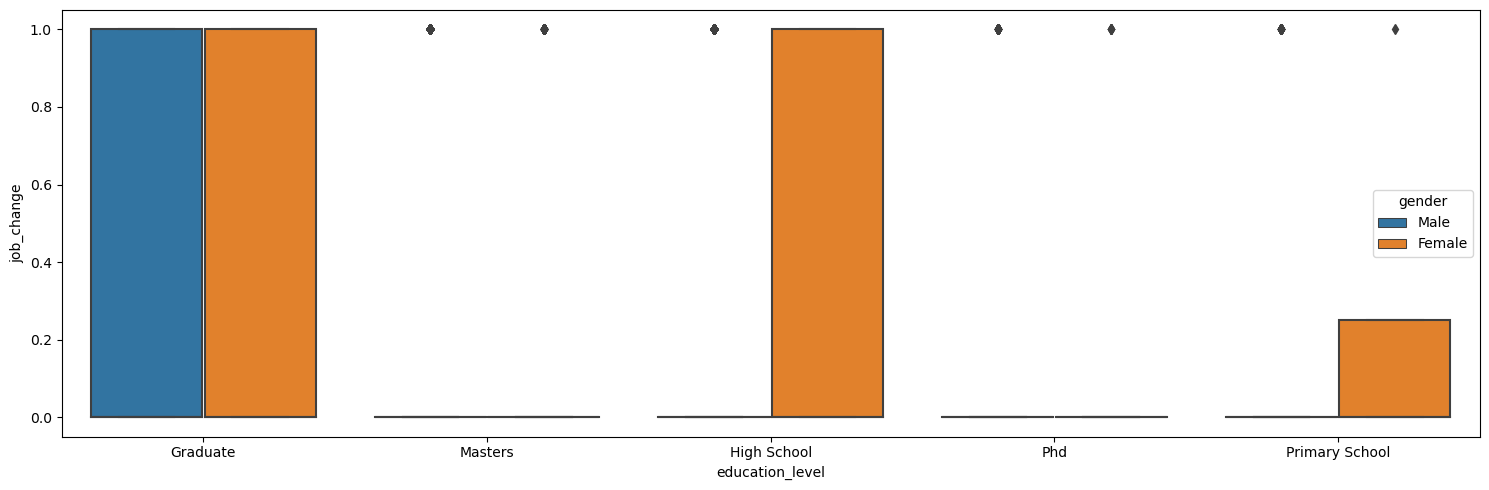

In [157]:
plt.figure(figsize=(15,5))
sns.boxplot(df,x='education_level',y='job_change',hue='gender')
plt.tight_layout()
plt.show()

# Modeling 

In [146]:
# importing models 
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix ,ConfusionMatrixDisplay

In [59]:
df.head(5)

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,20,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,4,47,0
2,11561,city_21,0.624,Male,No relevant experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0
3,33241,city_115,0.789,Male,No relevant experience,no_enrollment,Graduate,Business Degree,1,50-99,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0


In [47]:
# split our data to target and feature 
X= df.drop('job_change',axis=1)
y= df['job_change']

In [53]:
# encode
X = pd.get_dummies(X,drop_first=True)

In [110]:
#scale our data 
scale =StandardScaler()
scale.fit_transform(X)

array([[-0.82428493,  0.73891926, -0.4889846 , ..., -0.42234314,
        -0.23763104, -0.53949731],
       [ 1.33627144, -0.42840976, -0.30582494, ..., -0.42234314,
        -0.23763104,  1.85357736],
       [-0.55265549, -1.66059039,  0.29360665, ..., -0.42234314,
        -0.23763104, -0.53949731],
       ...,
       [ 0.80081203,  0.73891926, -0.35577758, ..., -0.42234314,
        -0.23763104,  1.85357736],
       [-1.15633424, -0.21764202,  0.52671894, ...,  2.367743  ,
        -0.23763104, -0.53949731],
       [ 0.7236493 ,  0.21199991,  1.02624527, ..., -0.42234314,
        -0.23763104, -0.53949731]])

In [112]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# AdaBoostClassifier

In [118]:
# model 1 
ada = AdaBoostClassifier(n_estimators=500,random_state=42)
#fit data 
ada.fit(X_train,y_train)
# prediction 
ada_pred = ada.predict(X_test)

0.7816055955736507 
 0.7732254697286013 
 [[2648  232]
 [ 637  315]] 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      2880
           1       0.58      0.33      0.42       952

    accuracy                           0.77      3832
   macro avg       0.69      0.63      0.64      3832
weighted avg       0.75      0.77      0.75      3832
 


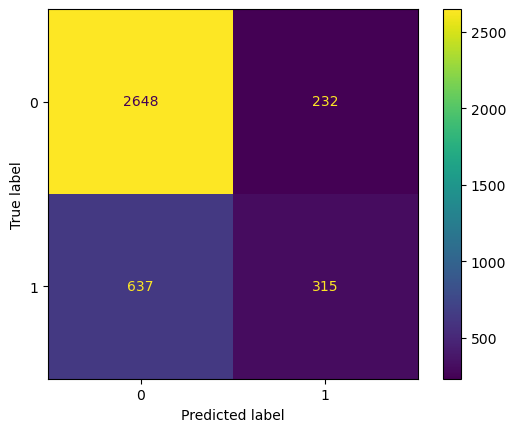

In [119]:
# evaluation 
print(
ada.score(X,y),'\n',
accuracy_score(y_test,ada_pred),'\n',
confusion_matrix(y_test,ada_pred),'\n',
classification_report(y_test,ada_pred),'\n',
ConfusionMatrixDisplay(confusion_matrix(y_test,ada_pred)).plot()
)

# BaggingClassifier

In [128]:
# inisiate BaggingClassifier
bag = BaggingClassifier(n_estimators=200,max_samples=10,max_features=20,random_state=42)
#fit our data 
bag.fit(X_train,y_train)
# prediction 
bag_pred = bag.predict(X_test)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

0.7506524689424784 
 0.7515657620041754 
 [[2880    0]
 [ 952    0]] 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      2880
           1       0.00      0.00      0.00       952

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832
 


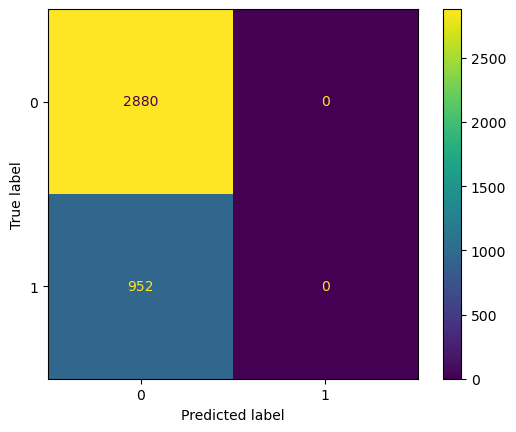

In [129]:
# evaluation 
print(
bag.score(X,y),'\n',
accuracy_score(y_test,bag_pred),'\n',
confusion_matrix(y_test,bag_pred),'\n',
classification_report(y_test,bag_pred),'\n',
ConfusionMatrixDisplay(confusion_matrix(y_test,bag_pred)).plot()
)

# GradientBoostingClassifier

In [135]:
# initiate our model 
gbc = GradientBoostingClassifier(n_estimators=500 ,max_depth=20,max_features=10)
# fit 
gbc.fit(X_train,y_train)
#prediction
gbc_pred =gbc.predict(X_test)

0.9526046560183735 
 0.7630480167014614 
 [[2574  306]
 [ 602  350]] 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      2880
           1       0.53      0.37      0.44       952

    accuracy                           0.76      3832
   macro avg       0.67      0.63      0.64      3832
weighted avg       0.74      0.76      0.75      3832
 


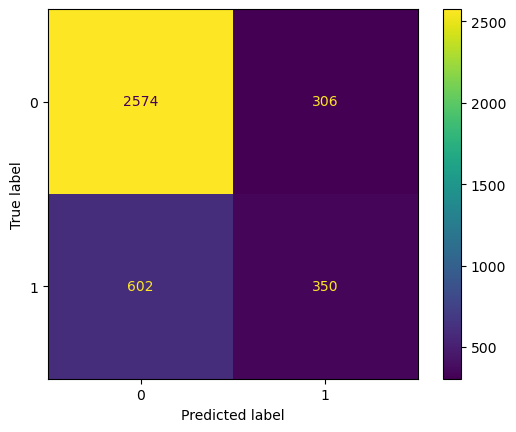

In [137]:
# evaluation 
print(
gbc.score(X,y),'\n',
accuracy_score(y_test,gbc_pred),'\n',
confusion_matrix(y_test,gbc_pred),'\n',
classification_report(y_test,gbc_pred),'\n',
ConfusionMatrixDisplay(confusion_matrix(y_test,gbc_pred)).plot()
)

# RandomForestClassifier 

In [186]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=100)
# fut
rfc.fit(X_train,y_train)
# prediction
rfc_pred = rfc.predict(X_test)

0.9534398162647458 
 0.7674843423799582 
 [[2579  301]
 [ 590  362]] 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      2880
           1       0.55      0.38      0.45       952

    accuracy                           0.77      3832
   macro avg       0.68      0.64      0.65      3832
weighted avg       0.75      0.77      0.75      3832
 


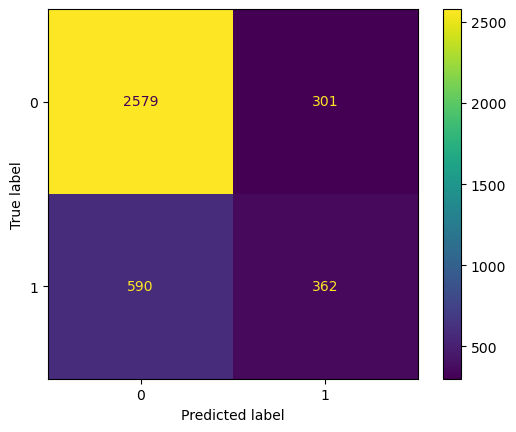

In [187]:
# evaluation 
print(
rfc.score(X,y),'\n',
accuracy_score(y_test,rfc_pred),'\n',
confusion_matrix(y_test,rfc_pred),'\n',
classification_report(y_test,rfc_pred),'\n',
ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_pred)).plot()
)